In [1]:
import tensorflow as tf
import numpy as np
import mglearn
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8, 4]

In [3]:
X = np.array(([0, 0], [0, 1], [1, 0], [1, 1]))
Y = np.array(([0, 1, 1, 0]))

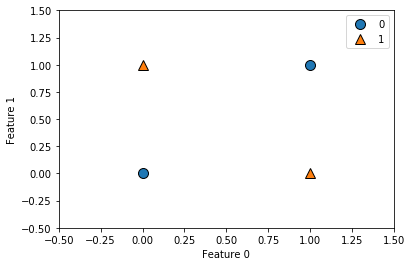

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['0', '1'])

In [3]:
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(tf.float32, [None, 2])  # 2 features
    y = tf.placeholder(tf.int64, [None])  # answers (integers)
    W = tf.Variable(tf.random_normal(shape=[2, 2]))
    b = tf.Variable(tf.random_normal(shape=[2]))
    pred = tf.nn.xw_plus_b(x, W, b)
    cost = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=pred)
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    pred_int = tf.argmax(pred, 1)
    correct_prediction = tf.equal(pred_int, y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [4]:
N_EPOCHS = 1000

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(N_EPOCHS):
        epoch_cost = 0.
        for _ in range(len(X)):
            _, c = sess.run([optim, cost], feed_dict={x: X, y: Y})
            epoch_cost += c
        if (epoch+1) % (N_EPOCHS // 10) == 0:
            print("Epoch:", '%02d' % (epoch+1), "cost={}".format(epoch_cost))

    w_internal, b_internal, answers, prediction, acc = sess.run([W, b, y, pred_int, accuracy], feed_dict={x: X, y: Y})
    print("Accuracy:", acc)
    print("W:", w_internal)
    print("b:", b_internal)
    print("Answers   :", answers)
    print("Prediction:", prediction)

Epoch: 100 cost=2.8598607182502747
Epoch: 200 cost=2.8094462156295776
Epoch: 300 cost=2.7887244820594788
Epoch: 400 cost=2.7798744440078735
Epoch: 500 cost=2.775985598564148
Epoch: 600 cost=2.7742202281951904
Epoch: 700 cost=2.7733924984931946
Epoch: 800 cost=2.7729930877685547
Epoch: 900 cost=2.7727953791618347
Epoch: 1000 cost=2.77269583940506
Accuracy: 0.5
W: [[ 0.27833512  0.26448208]
 [-1.2023504  -1.2270358 ]]
b: [-0.3315947  -0.30873886]
Answers   : [0 1 1 0]
Prediction: [1 0 1 0]


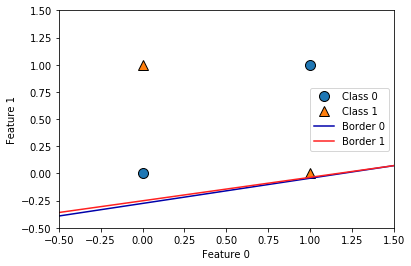

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
line = np.linspace(-1, 2)
for coef, bias, color in zip(w_internal.transpose(), b_internal, mglearn.cm3.colors):
    plt.plot(line, -(coef[0] * line + bias) / coef[1], c=color)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Border 0', 'Border 1'])

# 층을 더 쌓아보면? DEEP! LEARNING!

(N_SAMPLES, 2) => (2 x 20) => (20 x 2) => 2 answers (0 or 1)

In [6]:
g_2_layers = tf.Graph()
with g_2_layers.as_default():
    x = tf.placeholder(tf.float32, [None, 2])  # 2 features
    y = tf.placeholder(tf.int64, [None])  # answers (integers)
    W1 = tf.Variable(tf.random_normal(shape=[2, 20]))
    b1 = tf.Variable(tf.random_normal(shape=[20]))
    hidden_layer1 = tf.nn.xw_plus_b(x, W1, b1)
    W2 = tf.Variable(tf.random_normal(shape=[20, 2]))
    b2 = tf.Variable(tf.random_normal(shape=[2]))
    pred = tf.nn.xw_plus_b(hidden_layer1, W2, b2)
    cost = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=pred)
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    pred_int = tf.argmax(pred, 1)
    correct_prediction = tf.equal(pred_int, y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
N_EPOCHS = 1000

with tf.Session(graph=g_2_layers) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(N_EPOCHS):
        epoch_cost = 0.
        for _ in range(len(X)):
            _, c = sess.run([optim, cost], feed_dict={x: X, y: Y})
            epoch_cost += c
        if (epoch+1) % (N_EPOCHS // 10) == 0:
            print("Epoch:", '%02d' % (epoch+1), "cost={}".format(epoch_cost))

    w1_int, b1_int, w2_int, b2_int, answers, prediction, acc = sess.run([W1, b1, W2, b2, y, pred_int, accuracy], feed_dict={x: X, y: Y})
    print("Accuracy:", acc)
    print("W_1:", w1_int)
    print("b_1:", b1_int)
    print("W_2:", w2_int)
    print("b_2:", b2_int)
    print("Answers   :", answers)
    print("Prediction:", prediction)

Epoch: 100 cost=2.772588074207306
Epoch: 200 cost=2.7725894451141357
Epoch: 300 cost=2.7725894451141357
Epoch: 400 cost=2.7725894451141357
Epoch: 500 cost=2.7725894451141357
Epoch: 600 cost=2.7725894451141357
Epoch: 700 cost=2.7725894451141357
Epoch: 800 cost=2.7725894451141357
Epoch: 900 cost=2.7725894451141357
Epoch: 1000 cost=2.7725894451141357
Accuracy: 0.5
W_1: [[-0.12425512  1.395574   -0.4944209   0.9550111  -2.161823   -2.220628
   0.51954347  0.44847232 -0.44519186 -0.16086946  0.31036028  0.55241543
   0.04696406  0.11059666 -1.7540317   0.9788781   0.13746832 -1.2920239
  -2.0278478   1.2186849 ]
 [ 1.4345509   0.68354017  1.2107021  -2.3095658  -0.47884545 -1.1106745
  -0.68319213  1.078771   -0.8272349  -1.1412867  -0.5948475  -0.06407759
   0.7494569   0.02005035 -1.0745012   0.90182936  0.31197917  0.4749913
   1.7655307  -0.78975487]]
b_1: [-0.6022627   0.41726607  0.46844286 -0.24513046  0.46300265  0.8552453
  0.38404775 -0.292932    1.6350986   0.4391392   0.6301612 

# 문제 해결 실패. 왜?

$Y = W_{2}W_{1}X = W_{3}X$ where $W_{3} = W_{2}W_{1}$

In [8]:
g_2_layers_nonlinear = tf.Graph()
with g_2_layers_nonlinear.as_default():
    x = tf.placeholder(tf.float32, [None, 2])  # 2 features
    y = tf.placeholder(tf.int64, [None])  # answers (integers)
    W1 = tf.Variable(tf.random_normal(shape=[2, 20]))
    b1 = tf.Variable(tf.random_normal(shape=[20]))
    hidden_layer1 = tf.nn.relu(tf.nn.xw_plus_b(x, W1, b1))
    W2 = tf.Variable(tf.random_normal(shape=[20, 2]))
    b2 = tf.Variable(tf.random_normal(shape=[2]))
    pred = tf.nn.xw_plus_b(hidden_layer1, W2, b2)
    cost = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=pred)
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    pred_int = tf.argmax(pred, 1)
    correct_prediction = tf.equal(pred_int, y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
N_EPOCHS = 1000

with tf.Session(graph=g_2_layers_nonlinear) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(N_EPOCHS):
        epoch_cost = 0.
        for _ in range(len(X)):
            _, c = sess.run([optim, cost], feed_dict={x: X, y: Y})
            epoch_cost += c
        if (epoch+1) % (N_EPOCHS // 10) == 0:
            print("Epoch:", '%02d' % (epoch+1), "cost={}".format(epoch_cost))

    w1_int, b1_int, w2_int, b2_int, answers, prediction, acc = sess.run([W1, b1, W2, b2, y, pred_int, accuracy], feed_dict={x: X, y: Y})
    print("Accuracy:", acc)
    print("W_1:", w1_int)
    print("b_1:", b1_int)
    print("W_2:", w2_int)
    print("b_2:", b2_int)
    print("Answers   :", answers)
    print("Prediction:", prediction)

Epoch: 100 cost=0.4795459657907486
Epoch: 200 cost=0.28156348317861557
Epoch: 300 cost=0.19465352967381477
Epoch: 400 cost=0.14544285833835602
Epoch: 500 cost=0.11442389898002148
Epoch: 600 cost=0.09338454157114029
Epoch: 700 cost=0.07832718454301357
Epoch: 800 cost=0.0670967698097229
Epoch: 900 cost=0.0584457041695714
Epoch: 1000 cost=0.05160550866276026
Accuracy: 1.0
W_1: [[ 1.3795983   2.1196725  -1.031444    0.6590237  -0.7133036   1.6293435
  -0.17859463 -1.2823582   0.11292163  0.9048926  -0.12453841  0.33899048
  -0.07445721 -1.0890361  -0.7366541   1.1608971   0.7167851   1.2814106
   1.2742642  -1.237882  ]
 [ 0.9444942  -2.016939   -1.2987995  -0.06639153 -1.4266598   0.08220223
   0.3192138   0.03741903  0.9193421  -0.05610235  1.9806695  -0.9138289
  -1.3278481  -1.1451283   2.3436713  -0.6248531  -0.8409547  -1.1662439
   0.30513173  0.13021475]]
b_1: [-0.94437385 -0.10258441  0.4727103   0.7784349   1.336149    0.591967
 -0.8965318   0.2019424   1.4018852   1.0387788  -0.

# 해결!

Polynomial 방식이 아니라 linear를 그대로 가져가지만 공간을 뒤틀어서 sample에 적응하는 방식

Text(0.5,1,'ReLU')

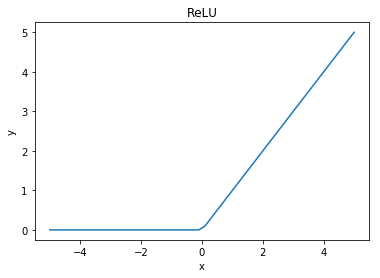

In [12]:
line = np.linspace(-5, 5)
relu = line.copy()
relu[relu < 0] = 0
plt.plot(line, relu)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU')

Text(0.5,1,'Sigmoid')

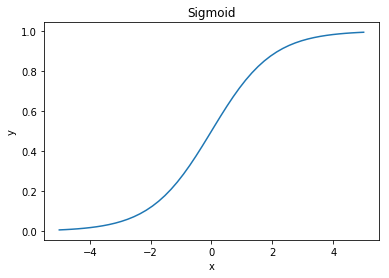

In [18]:
import math

line = np.linspace(-5, 5)
sigmoid = [1 / (1 + math.exp(-x)) for x in line]
plt.plot(line, sigmoid)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid')

# 끗